**<h1><font color="red"> Mortality Predictions in ICU using ANN** <font>
    
<i>Patients admitted to the ICU suffer from critical illness or injury and are at high risk of dying. ICU mortality rates differ widely depending on the underlying disease process, with death rates as low as 1 in 20 for patients admitted following elective surgery, and as high as 1 in 4 for patients with respiratory diseases. The risk of death can be approximated by evaluating the severity of a patient’s illness as determined by important physiologic, clinical, and demographic determinants.</i>

In [1]:
import tensorflow as tf

tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
from tensorflow.python.client import device_lib 
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8804638821254936333, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14674281152
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1659044740073100178
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd
import math 
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
import keras

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualisations
%matplotlib inline
sns.set_style( 'white' )

In [5]:
from google.colab import files
file = files.upload() 

Saving labels.csv to labels.csv


In [6]:
data_df = pd.read_csv('train.csv', encoding = 'utf-8')
labels = pd.read_csv('labels.csv', encoding = 'utf-8')

**<h2> Exploratory Data Analysis**

An  exploratory data analysis in order to identify the significant features contributing to the prediction of the mortality rate and ignoring the rest.

In [20]:
data_df.shape

(3999, 42)

In [19]:
data_df.columns

Index(['ALP', 'ALT', 'AST', 'Age', 'Albumin', 'BUN', 'Bilirubin',
       'Cholesterol', 'Creatinine', 'DiasABP', 'FiO2', 'GCS', 'Gender',
       'Glucose', 'HCO3', 'HCT', 'HR', 'Height', 'ICUType', 'K', 'Lactate',
       'MAP', 'MechVent', 'Mg', 'NIDiasABP', 'NIMAP', 'NISysABP', 'Na',
       'PaCO2', 'PaO2', 'Platelets', 'RecordID', 'RespRate', 'SaO2', 'SysABP',
       'Temp', 'TroponinI', 'TroponinT', 'Urine', 'WBC', 'Weight', 'pH'],
      dtype='object')

In [21]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ALP          3999 non-null   float64
 1   ALT          3999 non-null   float64
 2   AST          3999 non-null   float64
 3   Age          3999 non-null   int64  
 4   Albumin      3999 non-null   float64
 5   BUN          3999 non-null   float64
 6   Bilirubin    3999 non-null   float64
 7   Cholesterol  3999 non-null   float64
 8   Creatinine   3999 non-null   float64
 9   DiasABP      3999 non-null   float64
 10  FiO2         3999 non-null   float64
 11  GCS          3999 non-null   float64
 12  Gender       3999 non-null   int64  
 13  Glucose      3999 non-null   float64
 14  HCO3         3999 non-null   float64
 15  HCT          3999 non-null   float64
 16  HR           3999 non-null   float64
 17  Height       3999 non-null   float64
 18  ICUType      3999 non-null   int64  
 19  K     

<font color="green">Total 41 Numerical features in which most of them are float datatype except 3 i.e Age, Gender, ICUType, Mechvent</font>

In [7]:
data_df.head(10)

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,FiO2,GCS,Gender,Glucose,HCO3,HCT,HR,Height,ICUType,K,Lactate,MAP,MechVent,Mg,NIDiasABP,NIMAP,NISysABP,Na,PaCO2,PaO2,Platelets,RecordID,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,77.0,31.0,46.0,54,2.973333,10.500000,0.7,154.0,0.750000,58.795833,0.526667,14.923077,0,160.000000,27.000000,32.500000,70.810811,170.2,4,4.200,1.900000,78.934007,1,1.700000,50.147059,71.559118,114.382353,136.500000,39.666667,138.871212,203.000000,132539.0,17.428571,97.250000,116.891892,37.357143,2.10,0.14,171.052632,10.300000,80.060976,7.387273
1,77.0,31.0,46.0,76,2.973333,18.333333,0.7,154.0,1.100000,58.897059,0.560000,13.333333,1,125.500000,22.333333,28.655556,80.794118,175.3,2,3.900,1.900000,76.940299,1,2.300000,56.714286,75.308571,112.500000,137.000000,38.857143,210.142857,178.600000,132540.0,19.000000,96.833333,113.411765,36.939130,2.10,0.14,151.560976,11.266667,80.670588,7.395000
2,116.0,83.0,199.5,44,2.500000,4.666667,2.9,154.0,0.333333,67.125000,0.500000,5.923077,0,134.333333,25.000000,28.460000,83.759259,170.2,3,4.260,1.366667,90.437500,1,1.720000,79.000000,96.751316,132.263158,138.333333,35.500000,134.500000,89.666667,132541.0,19.000000,95.000000,125.687500,37.800000,2.10,0.14,124.951220,4.700000,56.700000,7.495000
3,105.0,12.0,15.0,68,4.400000,17.666667,0.2,154.0,0.766667,58.795833,0.526667,14.944444,1,117.333333,27.666667,37.442857,70.983333,180.3,3,4.000,1.900000,78.934007,1,2.033333,65.051724,83.885517,121.551724,139.333333,39.666667,138.871212,330.000000,132543.0,15.457627,97.250000,116.891892,36.223077,2.10,0.14,545.833333,9.400000,84.600000,7.387273
4,77.0,31.0,46.0,88,3.300000,35.000000,0.7,154.0,1.000000,58.795833,0.526667,15.000000,0,102.500000,19.000000,29.550000,74.958333,170.2,3,4.320,1.900000,78.934007,1,1.550000,45.720930,74.946512,133.395349,139.500000,39.666667,138.871212,103.000000,132545.0,19.166667,97.250000,116.891892,36.880000,2.10,0.14,62.131579,4.300000,80.060976,7.387273
5,77.0,31.0,46.0,68,2.973333,32.500000,0.7,154.0,3.600000,79.000000,0.526667,15.000000,0,105.000000,24.666667,31.600000,68.338983,162.6,3,3.775,1.900000,109.301887,1,1.900000,72.000000,102.147143,162.428571,139.000000,39.666667,138.871212,329.666667,132548.0,13.900000,97.250000,166.500000,36.630769,0.75,0.14,62.970588,6.366667,87.000000,7.387273
6,47.0,46.0,82.0,78,1.900000,64.600000,0.3,154.0,0.680000,39.266667,0.536364,11.846154,0,126.200000,13.600000,33.233333,70.945205,162.6,3,4.380,1.637500,64.766667,1,2.633333,30.697674,55.177907,104.139535,139.600000,30.533333,130.400000,96.333333,132551.0,19.000000,96.400000,125.550000,37.005556,3.30,0.14,43.810811,20.000000,48.400000,7.274000
7,77.0,31.0,46.0,64,2.973333,22.000000,0.7,154.0,0.700000,58.795833,0.526667,15.000000,0,112.500000,23.000000,28.300000,127.239130,170.2,3,4.200,1.900000,78.934007,1,1.650000,64.478261,84.477391,124.478261,139.000000,39.666667,138.871212,696.000000,132554.0,34.934783,97.250000,116.891892,36.900000,2.10,0.14,240.000000,15.200000,60.700000,7.387273
8,77.0,31.0,46.0,74,2.973333,19.333333,0.7,154.0,1.133333,58.410714,0.633333,14.083333,1,110.000000,24.666667,29.100000,85.189655,175.3,2,4.350,1.900000,79.517857,1,1.800000,53.000000,75.670000,121.000000,140.000000,44.875000,219.000000,145.666667,132555.0,19.000000,97.333333,124.892857,36.683333,2.10,0.14,108.085106,10.166667,68.582759,7.350000
9,402.0,36.0,47.0,64,2.700000,58.333333,0.1,154.0,1.233333,58.795833,0.526667,15.000000,0,114.000000,18.333333,25.025000,110.562500,170.2,3,4.200,5.566667,78.934007,1,2.900000,48.166667,57.288136,86.150000,135.666667,39.666667,138.871212,421.250000,132556.0,22.468750,97.250000,116.891892,36.708333,2.10,0.14,48.914286,25.700000,65.000000,7.387273


In [8]:
data_df.tail()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,FiO2,GCS,Gender,Glucose,HCO3,HCT,HR,Height,ICUType,K,Lactate,MAP,MechVent,Mg,NIDiasABP,NIMAP,NISysABP,Na,PaCO2,PaO2,Platelets,RecordID,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
3994,82.0,32.25,49.000000,70,3.0,16.000000,0.700000,145.0,0.900000,68.865385,0.442857,13.071429,0,121.00,21.500000,29.233333,99.230769,170.2,4,3.70,2.200000,86.865385,1,1.600000,62.966667,79.144333,111.500000,136.666667,40.428571,141.285714,208.000000,142665.0,19.290323,97.230769,117.230769,37.004762,2.2,0.125,50.769231,14.500000,87.000000,7.381429
3995,82.0,32.25,49.000000,25,3.0,4.400000,0.700000,117.0,0.840000,58.754774,0.528175,15.000000,1,145.80,23.800000,31.333333,79.136364,170.2,3,3.72,1.850000,79.351541,1,1.440000,58.409091,81.471364,127.590909,140.200000,40.000000,138.137931,130.333333,142667.0,17.636364,97.230769,117.820733,36.580000,2.2,0.125,584.375000,4.733333,166.400000,7.385000
3996,51.0,20.00,20.000000,44,3.0,7.750000,0.500000,145.0,1.125000,74.166667,0.412500,6.166667,1,106.75,24.750000,38.750000,97.884615,170.2,3,3.80,1.850000,89.666667,1,2.400000,60.804348,80.529130,119.978261,140.250000,42.000000,149.000000,225.000000,142670.0,19.290323,97.230769,125.666667,37.792308,2.2,0.125,116.472222,11.066667,109.000000,7.396667
3997,169.0,1971.00,1685.333333,37,3.1,89.250000,0.733333,145.0,9.650000,92.923077,0.533333,5.625000,1,129.50,26.750000,28.500000,88.461538,170.2,3,4.65,1.900000,115.730769,1,2.866667,56.260858,74.903194,115.551064,144.000000,44.200000,175.600000,325.750000,142671.0,19.290323,97.230769,166.615385,38.418182,2.2,0.125,11.230769,13.025000,87.400000,7.416000
3998,44.0,18.50,126.000000,78,2.2,20.166667,0.600000,145.0,1.116667,57.836957,0.600000,8.076923,0,126.00,19.666667,33.466667,88.531915,157.5,4,4.90,3.238462,76.472527,1,2.350000,60.266667,73.533333,118.733333,143.000000,40.041667,163.458333,100.222222,142673.0,19.290323,97.466667,111.532609,36.381395,2.2,0.125,57.750000,9.228571,87.838889,7.305600


In [22]:
data_df.describe()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,FiO2,GCS,Gender,Glucose,HCO3,HCT,HR,Height,ICUType,K,Lactate,MAP,MechVent,Mg,NIDiasABP,NIMAP,NISysABP,Na,PaCO2,PaO2,Platelets,RecordID,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.0,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,89.259978,91.709903,130.219258,64.247562,2.975942,25.449665,1.216527,152.403601,1.363130,59.262693,106.243369,11.615267,35.335834,137.087758,23.674534,31.424746,87.122729,169.945036,36.175544,4.136466,2.145524,80.449634,1.0,2.017580,57.209247,76.101723,117.045472,138.861354,40.255572,180.324554,204.987649,137605.348587,19.223967,96.940907,118.145550,36.956291,2.368702,0.337362,133.363074,12.521058,82.799384,7.488870
std,70.397850,427.290858,590.482153,17.563142,0.404440,20.586576,2.961385,13.891279,1.406947,9.080069,3858.226228,3.235578,2198.997715,39.938339,4.178864,4.510583,14.550804,14.805887,2113.064930,0.522405,1.792110,11.656091,0.0,0.304457,10.925580,11.306395,18.226100,4.053181,7.012932,2188.040909,102.494600,2922.264561,2.074830,2.296143,16.540816,0.727382,2.418656,1.276145,117.304284,6.466063,23.117431,2.986373
min,12.000000,3.000000,6.000000,15.000000,1.100000,2.250000,0.100000,0.000000,0.200000,0.000000,0.276000,1.000000,0.000000,49.000000,9.125000,16.600000,3.000000,1.800000,1.000000,2.500000,0.400000,2.000000,1.0,1.100000,0.000000,0.000000,0.000000,111.500000,16.000000,26.000000,8.200000,132539.000000,10.543478,38.800000,0.000000,21.644615,0.300000,0.010000,0.000000,0.100000,3.500000,6.311667
25%,77.000000,31.000000,46.000000,52.500000,2.973333,13.000000,0.700000,154.000000,0.700000,55.843712,0.500000,9.307692,0.000000,112.250000,21.333333,28.300000,77.270209,170.200000,2.000000,3.800000,1.784524,75.481103,1.0,1.840000,50.492031,69.111667,105.812937,136.500000,37.333333,116.900000,137.450000,135078.000000,19.000000,97.230769,111.099359,36.614286,2.100000,0.125000,74.044118,8.900000,68.201064,7.364142
50%,77.000000,31.000000,46.000000,67.000000,2.973333,19.000000,0.700000,154.000000,0.933333,58.795833,0.526667,12.428571,1.000000,129.800000,23.666667,30.630952,86.274510,170.200000,3.000000,4.075000,1.900000,78.934007,1.0,2.000000,56.280788,74.751250,115.366987,139.000000,39.666667,138.871212,187.200000,137589.000000,19.000000,97.250000,116.891892,36.968750,2.100000,0.140000,111.032258,11.466667,80.060976,7.387273
75%,82.000000,32.250000,49.000000,78.000000,3.000000,30.000000,0.700000,154.000000,1.366667,62.210006,0.562500,14.750000,1.000000,152.250000,26.000000,34.017143,96.473258,170.200000,4.000000,4.400000,2.000000,83.204416,1.0,2.150000,63.166667,81.739195,126.645833,141.000000,42.000000,163.732143,246.900000,140099.500000,19.290323,97.250000,123.504098,37.364401,2.100000,0.140000,160.419207,14.950000,93.040476,7.407500
max,1472.333333,9143.428571,15680.000000,90.000000,5.300000,170.833333,46.366667,330.000000,16.457143,106.666667,141264.000000,15.000000,139060.000000,467.333333,96.000000,61.050000,137.842105,431.800000,133628.000000,16.000000,85.000000,265.000000,1.0,6.900000,107.500000,132.540000,234.000000,164.533333,158.000000,138477.000000,925.666667,142673.000000,39.655172,100.000000,181.725000,39.748980,49.200000,24.040000,3082.380952,137.233333,300.000000,128.532500


<font color="green">We can see there is a huge difference between 75th percentile value and max, this indicate presence of outlier</font>

In [23]:
labels.shape

(3999, 1)

In [14]:
labels["In-hospital_death"].value_counts()

0    3445
1     554
Name: In-hospital_death, dtype: int64

In [15]:
new = pd.concat([data_df , labels] , axis = 1)
print(new.shape)

(3999, 43)


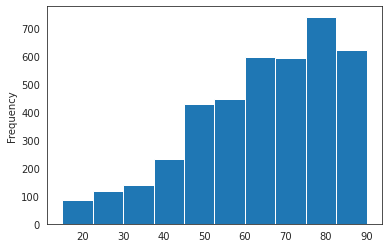

In [16]:
data_df.Age.plot.hist()

><font color="green">We can observe that most of the patient lies between  60 - 90 age</font>

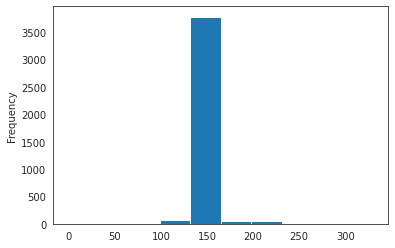

In [13]:
data_df.Cholesterol.plot.hist()

<font color="green">The normal cholestrol level is 125 - 200 mg/dl and we can see most of the patient have normal cholestrol</font>

**<h3>Using Correlation heatmap to find important features and their relations with other features.**

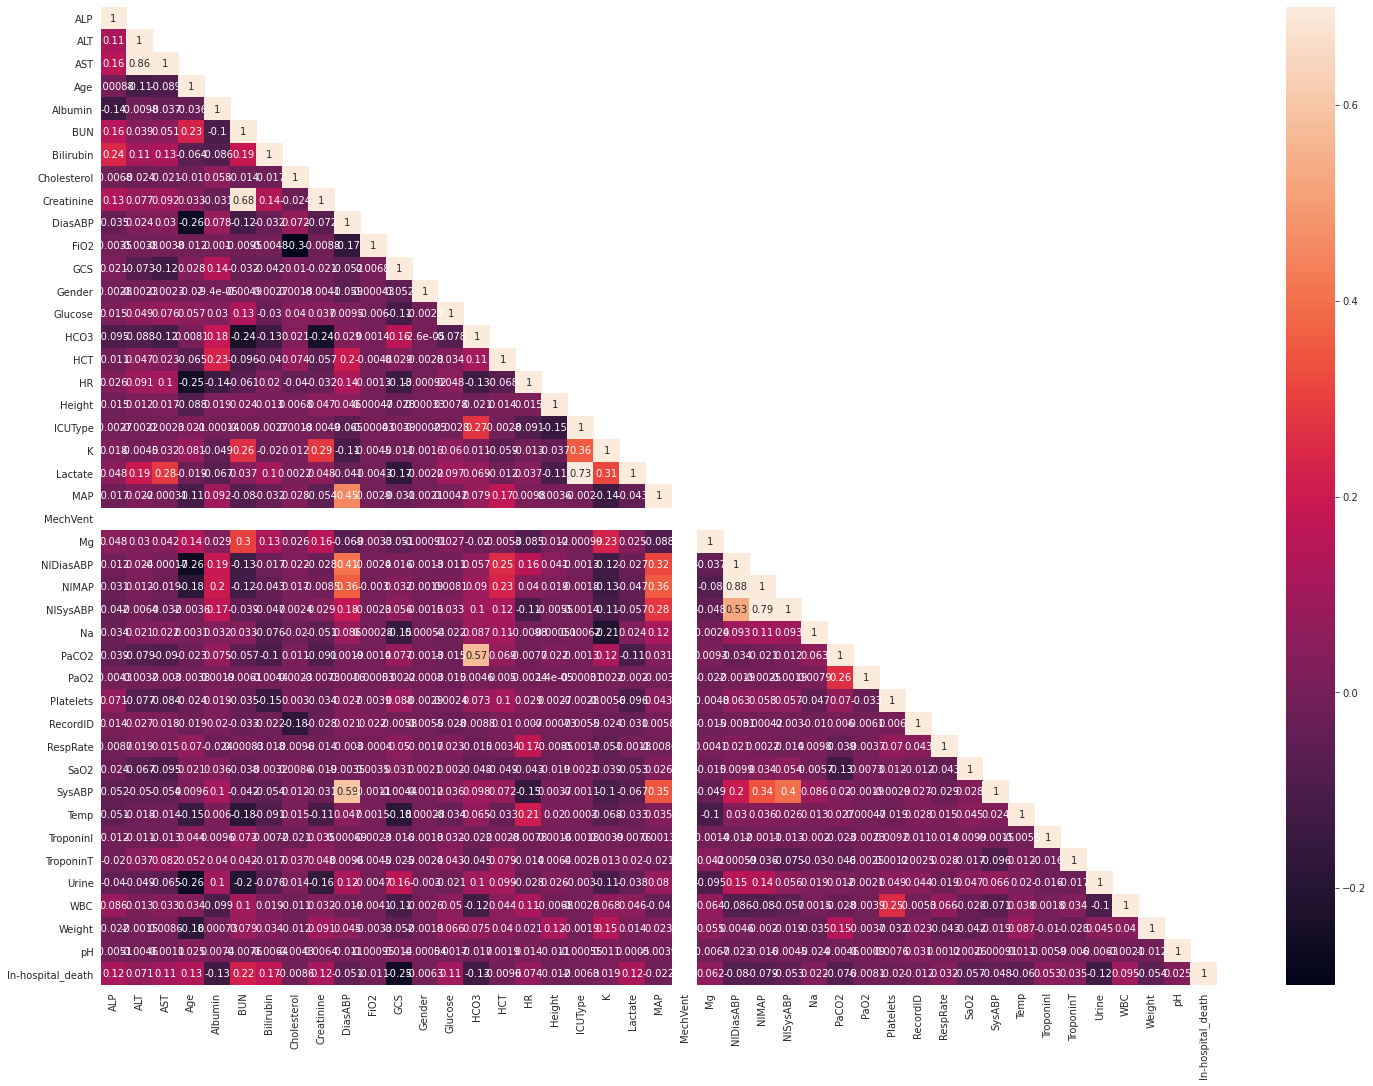

In [29]:
correlation_map = new[new.columns].corr()
objts = np.array(correlation_map)
objts[np.tril_indices_from(objts)] = False
fig,ax= plt.subplots()
fig.set_size_inches(25,18)
sns.heatmap(correlation_map, mask=objts,vmax=.7, annot=True,annot_kws={"size": 10})

><font color="green">NiMAP is highly correlated to NIDiasABP(0.88)

><font color="green">NiSysABP is correlated to NIMAP(0.79)

>Creatinine is correlated to BUN (0.68)</font>


In [30]:
new_df = new.drop(['In-hospital_death'] , axis =1)
new_df.shape

(3999, 42)

**Removing the irrelevent feature**

In [51]:
df = data_df.drop(['Gender','HCT','ICUType','Height','RecordID'] , axis =1)

**<h3> Scaling Data**

In [52]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
df = scaler.fit_transform(df)

**<H2> Deep Learning Model**

Dataframe df will be given as X parameter and Inhospitaldeath case will be given as Y.

In [53]:
X = df
y = labels["In-hospital_death"].values

In [54]:
print(X.shape , y.shape)

(3999, 37) (3999,)


**<h3>Splitting Dataset**

In [55]:
X_train , X_test , y_train , y_test  = train_test_split(X , y , test_size = 0.2,random_state=42)

In [56]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3199, 37) (800, 37) (3199,) (800,)


In [57]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
y_trEn = to_categorical(y_train, num_classes=2)
y_teEn = to_categorical(y_test, num_classes=2)

Importing necessary files.

In [58]:
from keras.models import Sequential
from keras.layers import Dense, Dropout , BatchNormalization
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.optimizers import RMSprop, Adam

**<h3> Building ANN Model**

In [59]:
model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1] , activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))


model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer = Adam(lr = 0.0005),loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                2432      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_11 (Dense)             (None, 196)               25284     
_________________________________________________________________
dense_12 (Dense)             (None, 196)               38612     
_________________________________________________________________
dense_13 (Dense)             (None, 196)               38612     
_________________________________________________________________
dense_14 (Dense)             (None, 196)               38612     
_________________________________________________________________
dense_15 (Dense)             (None, 196)              

**<h3> Fitting the model**


In [60]:
history = model.fit(X_train, y_trEn , epochs=30 , batch_size = 128 , validation_data=(X_test, y_teEn))

Epoch 1/30
25/25 [==============================] - 1s 12ms/step - loss: 0.5520 - accuracy: 0.8525 - val_loss: 0.5830 - val_accuracy: 0.8687
Epoch 2/30
25/25 [==============================] - 0s 5ms/step - loss: 0.3617 - accuracy: 0.8587 - val_loss: 0.5410 - val_accuracy: 0.8687
Epoch 3/30
25/25 [==============================] - 0s 5ms/step - loss: 0.3644 - accuracy: 0.8579 - val_loss: 0.5096 - val_accuracy: 0.8687
Epoch 4/30
25/25 [==============================] - 0s 5ms/step - loss: 0.3470 - accuracy: 0.8667 - val_loss: 0.5221 - val_accuracy: 0.8687
Epoch 5/30
25/25 [==============================] - 0s 5ms/step - loss: 0.3605 - accuracy: 0.8580 - val_loss: 0.4978 - val_accuracy: 0.8687
Epoch 6/30
25/25 [==============================] - 0s 5ms/step - loss: 0.3349 - accuracy: 0.8724 - val_loss: 0.4858 - val_accuracy: 0.8687
Epoch 7/30
25/25 [==============================] - 0s 5ms/step - loss: 0.3352 - accuracy: 0.8696 - val_loss: 0.4636 - val_accuracy: 0.8687
Epoch 8/30
25/25 [=

**<h3> Evaluating Performance using Accuracy ,Loss and Confusion Matrix**



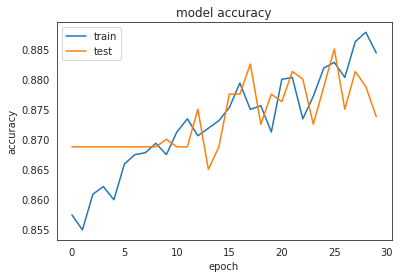

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

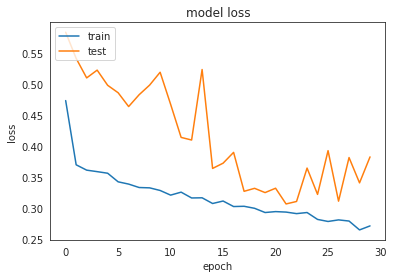

In [62]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [63]:
from sklearn.metrics import confusion_matrix
#prediction
ypred = model.predict(X_test)
pred = np.argmax(ypred,axis = 1) 
true = np.argmax(y_teEn,axis = 1)

In [64]:
len(pred),len(y_teEn)
cnf_matrix = confusion_matrix(true, pred)

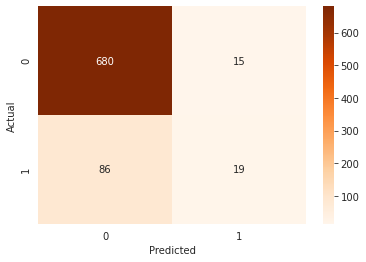

In [65]:

df_c = pd.DataFrame(true, columns=["y_true"])
df_c["y_pred"] = pred
confusion_matrix = pd.crosstab(df_c['y_true'], df_c['y_pred'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap='Oranges')
plt.show()

In [66]:
model.evaluate(X_test,y_teEn)

25/25 [==============================] - 0s 2ms/step - loss: 0.3828 - accuracy: 0.8737


[0.38279175758361816, 0.8737499713897705]

**<h2> Summary**

The above model has a loss of 0.3 and an accuracy of about 88%. This is the maximum accuracy it can reach with the given size of data. 

This model can be successfully used for predicting mortality in ICUs but then one should keep in mind that these values are just predicted values and the predictions can be wrong.